## 線形回帰モデルについての扱い
- 教師あり学習の定番
- y = ax+by+・・・hzとあらわすもの
- 基本的に過学習に注意
- 今回はmatplotlibとseabornの比較も行う

### 扱うデータついて
- 使用するデータはSIGNATEをから練習課題「お弁当大作戦」より
- 説明変数を確定して目的変数であるう「売り上げ」を策定するアルゴリズムを組むことが目標である。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

In [3]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [4]:
trainX = train["temperature"]
testX = test["temperature"]
trainY = train["y"]

## §1単回帰分析について
- 説明変数一つの時は、変数の形を独立させる必要がある。
- 行ベクトル一次元に分割する

In [5]:
trainX1 = trainX.values.reshape(-1,1)#変形させる形んの目標
testX1 = testX.values.reshape(-1,1)
print(trainX.head(),trainX1[0:4])#変形前と後の比較になる

0    19.8
1    17.0
2    15.5
3    15.2
4    16.1
Name: temperature, dtype: float64 [[19.8]
 [17. ]
 [15.5]
 [15.2]]


傾き: [-2.5023821]
切片: 134.79948383749922


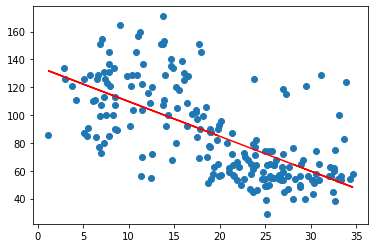

In [6]:
model1 = LR()
model1.fit(trainX1,trainY)
#傾きと切片の確認
print("傾き:",model1.coef_)
print("切片:",model1.intercept_)
#作成したモデルを図示してみる
plt.scatter(trainX1,trainY)
plt.plot(trainX1,model1.predict(trainX1),color = "red")

In [7]:
#skleanのリニアモデルを用いて予測する
pred = model1.predict(testX1)
pred #これが結果

array([ 84.25136537,  74.99255159,  62.9811175 ,  80.99826864,
        79.49683938,  76.49398085,  78.49588653,  69.48731097,
        67.73564349,  95.76232304,  88.25517673,  77.24469548,
        74.99255159,  84.25136537,  96.01256125,  98.01446693,
        88.00493852,  77.99541011,  87.00398568,  85.75279463,
        85.75279463,  87.75470031,  87.5044621 ,  94.7613702 ,
        86.75374747,  84.50160358,  81.74898327,  98.01446693,
        98.76518156,  86.00303284,  95.26184662,  99.01541977,
        94.51113199,  97.51399051, 108.52447176,  97.51399051,
       106.27232787, 111.7775685 ,  97.01351409,  96.51303767])

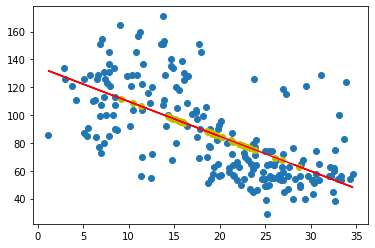

In [8]:
#matpoltlibで結果を出力
plt.scatter(trainX1,trainY)
plt.plot(trainX,model1.predict(trainX1),color = "red")
plt.scatter(testX1,pred,color = "y")

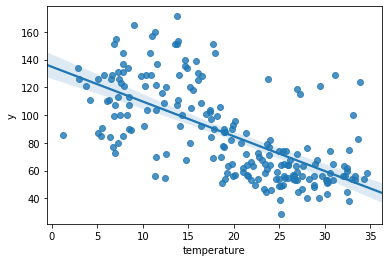

In [9]:
#seabornを用いると簡単に再現が可能
sns.regplot(x="temperature",y="y",data=train,ci=95)

## §2重回帰分析導入
- 今回はダミー関数を使って検証
- 説明変数"week" "temperature"を用いる。

In [10]:
train["week"].value_counts()

木    43
水    43
金    41
火    41
月    39
Name: week, dtype: int64

In [11]:
trainX2 = pd .get_dummies(train[["temperature","week"]])
testX2 = pd.get_dummies(test[["temperature","week"]])

In [12]:
trainY = train["y"]

In [13]:
model2 = LR()

In [14]:
model2.fit(trainX2,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
pred2 = model2.predict(testX2)

In [16]:
pred2

array([ 82.37908978,  65.54193684,  64.21341177,  89.37081192,
        81.43666396,  74.5088695 ,  69.09622987,  70.81424168,
        69.5043945 ,  94.05748117,  78.99747474,  78.68446197,
        83.27773815,  86.26034736,  94.31135925,  88.89871962,
        89.60121914,  86.32427504,  89.05300617,  83.90235823,
        76.45869401,  89.34734106,  89.56076232,  93.04196888,
        77.4742063 ,  86.0469261 ,  90.13244614, 100.22364142,
        97.10401806,  76.71257208,  96.96368327, 107.65003323,
        96.66934838,  95.83462769,  99.56159871,  99.24858594,
       108.60161785, 110.30567789,  87.88320732,  98.23307364])

## §3 特徴量の作成
- head関数で確認する
- 年月日時データを""-で区切って新たに作成する。
- データフレームを確認する。
- lambdaを用いてデータフレームに計算を定義。
- 日付データは数値に変換する

In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv",header=None)
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


### datetimeの区切り方
- apply関数でデータフレームに反映
- split関数で区切って、何項目かを選択する
- split("-")[0]で年・split("-")[1]で月・split("-")[2]で日付

In [80]:
train["year"] = train["datetime"].apply(lambda x : x.split("-")[0])
train["month"] = train["datetime"].apply(lambda x : x.split("-")[1])
train["date"] = train["datetime"].apply(lambda x : x.split("-")[2])
test["year"] = test["datetime"].apply(lambda x : x.split("-")[0])
test["month"] = test["datetime"].apply(lambda x : x.split("-")[1])
test["date"] = test["datetime"].apply(lambda x : x.split("-")[2])
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,18
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,19
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,20
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,21
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,22


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
datetime         207 non-null object
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
year             207 non-null object
month            207 non-null object
date             207 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 24.4+ KB


In [82]:
i = 0
S = [train["year"],train["month"],train["date"],test["year"],
     test["month"],test["date"]]
while True:
    if i in (0,1,2,3,4,5):
        S[i] = S[i].astype(np.int)
        print(i,"回処理")
        i+=1
    else:
        print("処理終了")
        break


train["year"] = S[0]
train["month"] = S[1]
train["date"] = S[2]
test["year"] = S[3]
test["month"] = S[4]
test["date"] = S[5]

0 回処理
1 回処理
2 回処理
3 回処理
4 回処理
5 回処理
処理終了


In [83]:
train["year"].mean()

2013.8647342995168

In [84]:
train["year"].mean()

2013.8647342995168

In [85]:
trainX3 = train[["year","month","date"]]
testX3 = test[["year","month","date"]]
trainX3.head()

,year,month,date
0,2013,11,18
1,2013,11,19
2,2013,11,20
3,2013,11,21
4,2013,11,22


In [86]:
y = train["y"]
model3 = LR()
model3.fit(trainX3,y)
pred3 = model3.predict(testX3)

In [87]:
sample[1] = pred3
sample.head()

,0,1
0,2014-10-1,49.676916
1,2014-10-2,49.133988
2,2014-10-3,48.591060
3,2014-10-6,46.962275
4,2014-10-7,46.419347


### §3-2 特徴量の改良
- 表を見直してみる
- 誤差を確認する

In [138]:
#trainで予測値を出してみる
pred_use = model3.predict(trainX3)
train["予測値"] = pred_use
def jisaku2():
    train["誤差"] = train["y"] - train["予測値"]

jisaku2()
#誤差を確認してみる
train.sort_values(by="誤差")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,予測値,誤差,fun
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,138.647453,-48.647453,0
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,26,126.699939,-46.699939,0
107,2014-5-2,47,金,0,鶏の天ぷら,420.0,NaN,NaN,NaN,晴れ,--,23.3,2014,5,2,87.154433,-40.154433,0
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,26,89.332336,-38.332336,0
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,19,138.104525,-37.104525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2014-5-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,薄曇,--,26.9,2014,5,30,71.952445,47.047555,1
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,13,73.578134,47.421866,1
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,11,67.059902,56.940098,1
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,12,51.308795,63.691205,1


In [125]:
train["remarks"].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
手作りの味                        1
酢豚（28食）、カレー（85食）             1
スペシャルメニュー（800円）              1
鶏のレモンペッパー焼（50食）、カレー（42食）     1
Name: remarks, dtype: int64

In [130]:
def jisaku1(x) :
    if x == "お楽しみメニュー":
        return 1
    elif x == "料理長のこだわりメニュー":
        return 2
    else:
        return 0

train["fun"] = train["remarks"].apply(lambda x : jisaku1(x))
test["fun"] = test["remarks"].apply(lambda x : jisaku1(x))

train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,予測値,誤差,fun
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,138.647453,-48.647453,0
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,19,138.104525,-37.104525,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,20,137.561597,-19.561597,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,21,137.018669,-17.018669,0
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,22,136.475741,-6.475741,0


In [135]:
trainX4 = train[["year","month","fun","temperature","soldout"]]
testX4 = test[["year","month","fun","temperature","soldout"]]
y = train["y"]
model4 = LR()
model4.fit(trainX4,y)
pred4 = model4.predict(testX4)
sample[1] = pred4

sample.to_csv("sisaku1.csv",index=None,header=None)

In [136]:
trainX5 = train[["year","month","date","fun","temperature","soldout"]]
testX5 = test[["year","month","date","fun","temperature","soldout"]]
y = train["y"]
model5 = LR()
model5.fit(trainX5,y)
pred5 = model5.predict(testX5)
sample[1] = pred5

sample.to_csv("sisaku2.csv",index=None,header=None)

In [148]:
pred_use2 = model4.predict(trainX4)
train["予測値"] = pred_use2
jisaku2()
train.sort_values(by="誤差")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,予測値,誤差,fun
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,26,137.044840,-57.044840,0
119,2014-5-22,54,木,1,サーモンのムニエル2色ソース,428.0,料理長のこだわりメニュー,NaN,NaN,雷電,0,19.0,2014,5,22,105.747596,-51.747596,2
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,131.240254,-41.240254,0
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,27,95.325073,-40.325073,0
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,26,89.394120,-38.394120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2014-2-3,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9,2014,2,3,97.441156,41.558844,0
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,13,77.612138,43.387862,1
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,12,63.959271,51.040729,1
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,11,68.543468,55.456532,1


In [147]:
train[train["y"] <=100].sort_values(by="y")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,予測値,誤差,fun
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2,2014,9,22,52.495577,-23.495577,0
169,2014-8-1,38,金,0,豚肉の生姜焼き,380.0,NaN,NaN,NaN,薄曇,--,32.7,2014,8,1,51.091363,-13.091363,0
186,2014-8-29,39,金,0,チキンの辛味噌焼き,398.0,NaN,NaN,NaN,曇,0,25.1,2014,8,29,57.779928,-18.779928,0
176,2014-8-12,40,火,1,厚切ハムカツ,400.0,NaN,NaN,NaN,雨,0,29.4,2014,8,12,54.382093,-14.382093,0
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1,2014,9,30,49.943362,-9.943362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2014-2-18,99,火,0,海老フライとホタテ串カツ,426.0,NaN,NaN,NaN,晴れ,--,6.8,2014,2,18,105.063347,-6.063347,0
87,2014-4-3,100,木,1,酢豚,390.0,NaN,NaN,NaN,雨,1,14.3,2014,4,3,88.456588,11.543412,0
66,2014-3-4,100,火,1,回鍋肉,413.0,NaN,NaN,NaN,晴れ,--,8.3,2014,3,4,98.933377,1.066623,0
78,2014-3-20,100,木,1,鶏の親子煮,372.0,NaN,キャリアアップ支援セミナー,NaN,雨,0.5,7.5,2014,3,20,99.637437,0.362563,0


In [179]:
a = train["name"].value_counts()
df = pd.DataFrame(a)
df.to_csv("list_name.csv",header=None)

In [196]:
name_list = pd.read_csv("list_name.csv",header=None)
name_list.rename(columns={0:"name",1:"counts"})
name_list

,0,1
0,メンチカツ,6
1,タンドリーチキン,6
2,手作りロースカツ,5
3,マーボ豆腐,4
4,鶏の唐揚げおろしソース,4
...,...,...
151,白身魚の南部焼き,1
152,鶏肉の山賊焼き,1
153,名古屋味噌カツ,1
154,ハンバーグ（デミきのこバター）,1


In [242]:
a=name_list[name_list[1]==6].copy()
b=name_list[name_list[1]==5].copy()
c=name_list[name_list[1]==4].copy()
d=name_list[name_list[1]==3].copy()
e=name_list[name_list[1]==2].copy()
print("a:",len(a),"b:",len(b),"c:",len(c),"d:",len(d),"e:",len(e))

e[0]

a: 2 b: 1 c: 4 d: 7 e: 11


14      ハンバーグデミソース
15     ハンバーグカレーソース
16    カレイ唐揚げ野菜あんかけ
17          鶏チリソース
18           マーボ茄子
19        手作りチキンカツ
20            青椒肉絲
21        ロース甘味噌焼き
22     鶏のカッシュナッツ炒め
23        ボローニャ風カツ
24         手作りヒレカツ
Name: 0, dtype: object

In [251]:
train["name"][0]

'厚切りイカフライ'

In [276]:
for i in range(0,len(train)):
    if train["name"][i] in ["メンチカツ","タンドリーチキン"]:
        train["num"][i] = 6
    
    elif train["name"][i] in ["手作りロースカツ"]:
        train["num"][i] = 5
    
    elif train["name"][i] in ["マーボ豆腐","鶏の唐揚げおろしソース","回鍋肉","肉じゃが"]:
        train["num"][i] = 4
    
    elif train["name"][i] in ["鶏の味噌漬け焼き","酢豚","手作りひれかつ","チンジャオロース",
                              "チキンカレー","ポークカレー","キーマカレー"]:
        train["num"][i] = 3
    
    elif train["name"][i] in ["ハンバーグデミソース","ハンバーグカレーソース","ハンバーグカレーソース","カレイ唐揚げ野菜あんかけ"
                             "カレイ唐揚げ野菜あんかけ","マーボ茄子","手作りチキンカツ","青椒肉絲",
                             "ロース甘味噌焼き","鶏のカッシュナッツ炒め","ボローニャ風カツ","手作りヒレカツ"]:
        train["num"][i] = 2
    
    else:
        train["num"][i] =1
#testでも実行


C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: Setting

In [277]:
test["num"] = test["name"]

In [278]:
for i in range(0,len(test)):
    if test["name"][i] in ["メンチカツ","タンドリーチキン"]:
        test["num"][i] = 6
    
    elif test["name"][i] in ["手作りロースカツ"]:
        test["num"][i] = 5
    
    elif test["name"][i] in ["マーボ豆腐","鶏の唐揚げおろしソース","回鍋肉","肉じゃが"]:
        test["num"][i] = 4
    
    elif test["name"][i] in ["鶏の味噌漬け焼き","酢豚","手作りひれかつ","チンジャオロース",
                              "チキンカレー","ポークカレー","キーマカレー"]:
        test["num"][i] = 3
    
    elif test["name"][i] in ["ハンバーグデミソース","ハンバーグカレーソース","ハンバーグカレーソース","カレイ唐揚げ野菜あんかけ"
                             "カレイ唐揚げ野菜あんかけ","マーボ茄子","手作りチキンカツ","青椒肉絲",
                             "ロース甘味噌焼き","鶏のカッシュナッツ炒め","ボローニャ風カツ","手作りヒレカツ"]:
        test["num"][i] = 2
    
    else:
        test["num"][i] =1

C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [281]:
test["num"].value_counts()

1    36
3     3
6     1
Name: num, dtype: int64

In [284]:
trainX5 = train[["year","month","fun","temperature","soldout","num"]]
testX5 = test[["year","month","fun","temperature","soldout","num"]]
trainY5 = train["y"]
model5 = LR()
model5.fit(trainX5,trainY5)
pred5 = model5.predict(testX5)
sample[1] = pred5
sample.to_csv("sisakuhin3.csv",index=None,header=None)

In [286]:
train[train["num"]==6]["y"].mean()

74.08333333333333

In [300]:
train[train["num"]==6]["y"]

19     111
58      85
67     110
85     125
104     54
109     59
113     64
114     58
134     72
148     50
167     58
191     43
Name: y, dtype: int64

In [288]:
train[train["num"]==5]["y"].mean()

101.0

In [289]:
train[train["num"]==4]["y"].mean()

103.8125

In [290]:
train[train["num"]==3]["y"].mean()

97.0952380952381

In [291]:
train[train["num"]==2]["y"].mean()

98.05555555555556

In [292]:
train[train["num"]==1]["y"].mean()

82.01481481481481

In [295]:
train["mean"] = train["num"]
train[train["num"]==6]["mean"] =74
train[train["num"]==5]["mean"] =101
train[train["num"]==4]["mean"] =103
train[train["num"]==3]["mean"] =97
train[train["num"]==2]["mean"] =78
train[train["num"]==1]["mean"] =83

test["mean"] = test["num"]
test[test["num"]==6]["mean"] =74
test[test["num"]==5]["mean"] =101
test[test["num"]==4]["mean"] =103
test[test["num"]==3]["mean"] =97
test[test["num"]==2]["mean"] =78
test[test["num"]==1]["mean"] =83

C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mesub\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [296]:
trainX6 = train[["year","month","fun","temperature","soldout","mean"]]
testX6 = test[["year","month","fun","temperature","soldout","mean"]]
trainY6 = train["y"]
model6 = LR()
model6.fit(trainX6,trainY6)
pred6 = model6.predict(testX6)
sample[1] = pred6
sample.to_csv("sisakuhin4.csv",index=None,header=None)

In [297]:
pred_use3 = model6.predict(trainX6)
train["予測値"] = pred_use3
jisaku2()
train.sort_values(by="誤差")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,予測値,誤差,fun,num,mean
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,26,137.417816,-57.417816,0,3,3
119,2014-5-22,54,木,1,サーモンのムニエル2色ソース,428.0,料理長のこだわりメニュー,NaN,NaN,雷電,0,19.0,2014,5,22,105.429080,-51.429080,2,1,1
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,130.959392,-40.959392,0,1,1
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,27,95.268995,-40.268995,0,2,2
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,26,89.038659,-38.038659,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2014-2-3,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9,2014,2,3,97.381098,41.618902,0,2,2
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,13,78.062704,42.937296,1,3,3
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,12,64.459481,50.540519,1,3,3
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,11,69.033899,54.966101,1,3,3


In [299]:
trainX7 = pd.get_dummies(train[["year","month","fun","temperature","soldout","mean","weather"]])
testX7 = pd.get_dummies(test[["year","month","fun","temperature","soldout","mean","weather"]])
trainY7 = train["y"]
model7 = LR()
model7.fit(trainX7,trainY7)
pred7 = model7.predict(testX7)
sample[1] = pred7
sample.to_csv("sisakuhin5.csv",index=None,header=None)